# Notebook analyzing WhatsApp chat data

In [45]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

# NLTK stopwords download
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andilejaden/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load and clean the chats

In [46]:
df = pd.read_csv('../datasets/whatsapp_chats_with_prie.csv')

In [47]:
# Stripping off any leading/trailing spaces from the column headers
df.columns = df.columns.str.strip()

In [48]:
# Stripping spaces from the Date column
df['Date'] = df['Date'].str.strip()

In [49]:
# Converting 'Date' and 'Time' columns to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'].str.strip(), format='%H:%M:%S', errors='coerce').dt.time

In [50]:
# Dropping rows with NaT in 'Date' or NaT in 'Time'
df.dropna(subset=['Date', 'Time'], inplace=True)

In [51]:
# Converting 'Message' column to string and removing NaN values
df['Message'] = df['Message'].astype(str)
df.dropna(subset=['Message'], inplace=True)

## 1. Comparison of messages sent between two participants

In [52]:
participant1 = 'Prie♥️'  
participant2 = 'Google Jr' 

participant1_messages = df[df['Sender'] == participant1]
participant2_messages = df[df['Sender'] == participant2]

participant1_message_count = len(participant1_messages)
participant2_message_count = len(participant2_messages)

print(f"\nComparison of messages sent between {participant1} and {participant2}:")
print(f"{participant1}: {participant1_message_count} messages")
print(f"{participant2}: {participant2_message_count} messages")


Comparison of messages sent between Prie♥️ and Google Jr:
Prie♥️: 4387 messages
Google Jr: 4411 messages


## 2. Day with most messages

In [53]:
most_active_day = df['Date'].value_counts().idxmax()
print("\nDay with the most activity:", most_active_day.date())


Day with the most activity: 2023-12-21


## 3. Most active time during the day

In [54]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)
most_active_time = df['Hour'].value_counts().idxmax()
print("\nMost active time during the day:", most_active_time, ":00")


Most active time during the day: 21 :00


## 4. Commonly used words

In [55]:
stop_words = set(stopwords.words('english'))
def preprocess_message(message):
    message = re.sub(r'[^\w\s]', '', message).lower()
    return message

## Combining all messages into a single string

In [56]:
all_messages = ' '.join(df['Message'].apply(preprocess_message))

In [57]:
# Tokenizing the string into words. Magic happens here!
words = all_messages.split()

In [58]:
# Removing stopwords
words = [word for word in words if word not in stop_words]

In [59]:
# Counting the frequency of each word using built-in Counter for efficiency
word_freq = Counter(words)

# Get the 20 most common words. You can filter out some words if needed e.g. yes, no, ok, etc.
most_common_words = word_freq.most_common(20)
print("\nMost Commonly Used Words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Most Commonly Used Words:
babe: 1725
im: 860
good: 567
love: 552
morning: 351
sthandwa: 275
n: 237
call: 217
ill: 210
well: 208
thank: 191
dont: 182
know: 173
miss: 152
night: 151
thats: 146
yeah: 144
like: 142
youre: 137
get: 136


## Plotting the participants

/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9829 (\N{BLACK HEART SUIT}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)


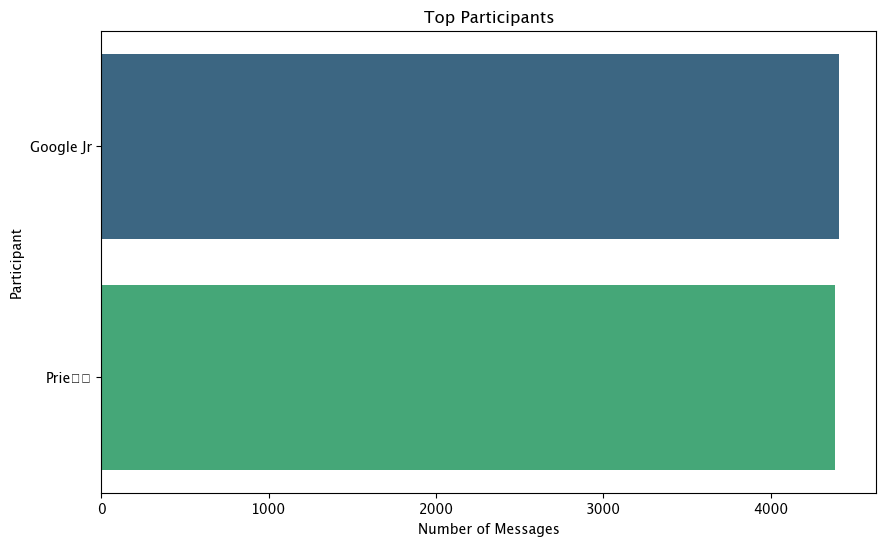

In [60]:
top_participants = df['Sender'].value_counts().nlargest(2)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_participants.values, y=top_participants.index, palette='viridis', hue=top_participants.index)
plt.title('Top Participants')
plt.xlabel('Number of Messages')
plt.ylabel('Participant')
plt.show()

## Message count by hour

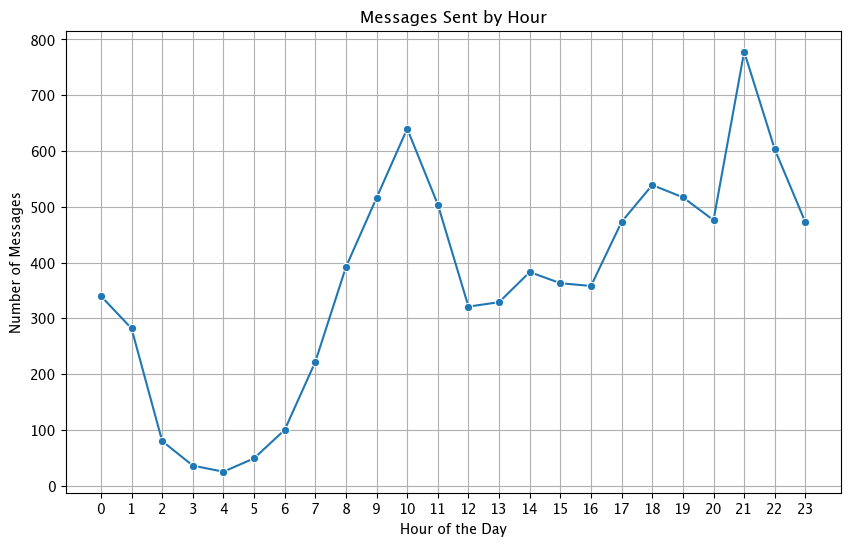

In [61]:
hourly_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Messages Sent by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Generate a word cloud

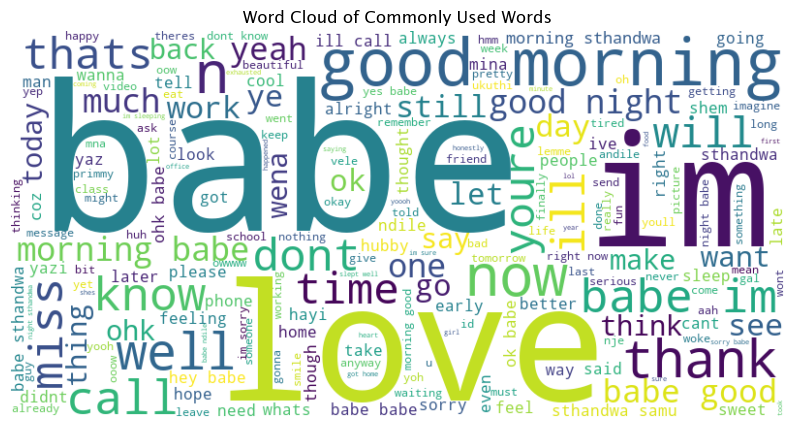

In [62]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Commonly Used Words')
plt.show()

In [65]:
# Total "I love you" counts for both participants
participant1_love_count = participant1_messages['Message'].str.contains('i love you', case=False).sum()
participant2_love_count = participant2_messages['Message'].str.contains('i love you', case=False).sum()

print(f"\nTotal 'I love you' counts:")
print(f"{participant1}: {participant1_love_count}")
print(f"{participant2}: {participant2_love_count}")


Total 'I love you' counts:
Prie♥️: 155
Google Jr: 147


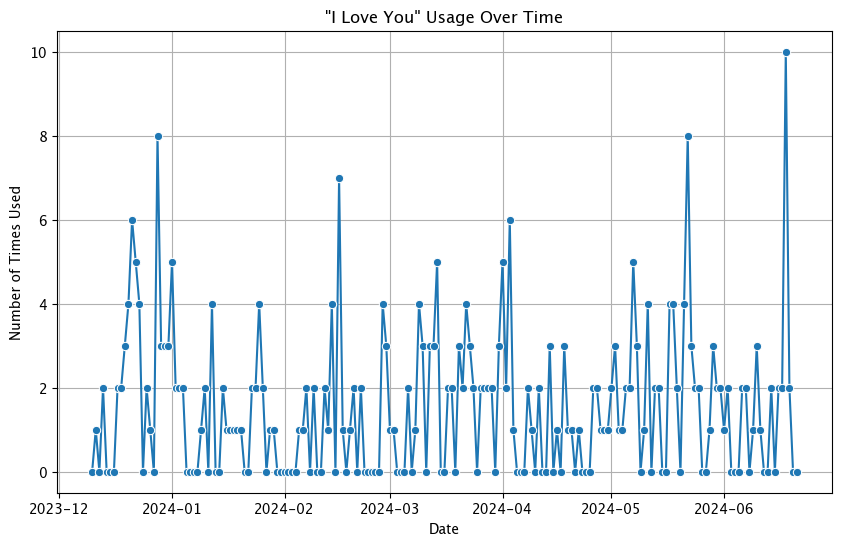

In [71]:
# Show "I love you" usage over time
df['ILoveYou'] = df['Message'].str.contains('i love you', case=False)
iloveyou_counts = df.groupby('Date')['ILoveYou'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=iloveyou_counts.index, y=iloveyou_counts.values, marker='o')
plt.title('"I Love You" Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Times Used')
plt.grid(True)
plt.show()

In [72]:
# Who says "babe" more?
participant1_babe_count = participant1_messages['Message'].str.contains('babe', case=False).sum()
participant2_babe_count = participant2_messages['Message'].str.contains('babe', case=False).sum()

print(f"\nTotal 'babe' counts:")
print(f"{participant1}: {participant1_babe_count}")
print(f"{participant2}: {participant2_babe_count}")


Total 'babe' counts:
Prie♥️: 1024
Google Jr: 701


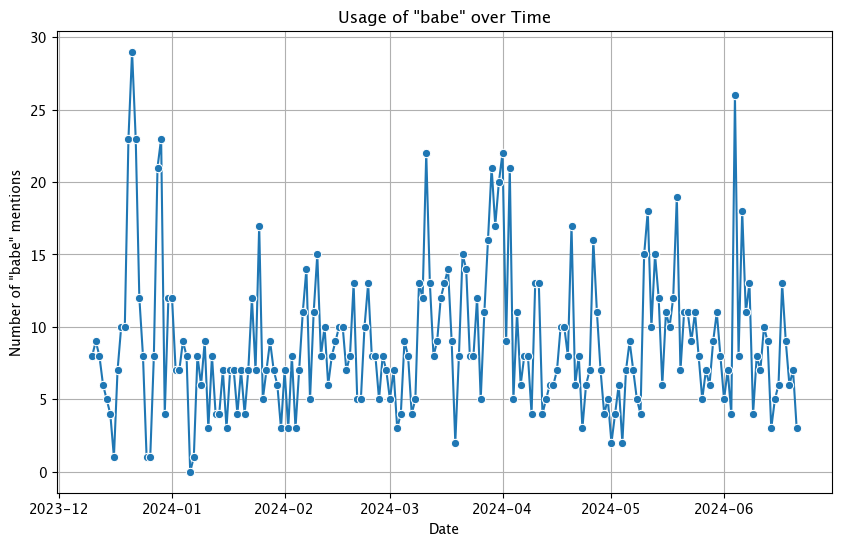

In [77]:
# Show "babe" usage over time
df['babe_count'] = df['Message'].str.count('babe', re.I)
babe_counts = df.groupby('Date')['babe_count'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=babe_counts.index, y=babe_counts.values, marker='o')
plt.title('Usage of "babe" over Time')
plt.xlabel('Date')
plt.ylabel('Number of "babe" mentions')
plt.grid(True)
plt.show()

/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9829 (\N{BLACK HEART SUIT}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)


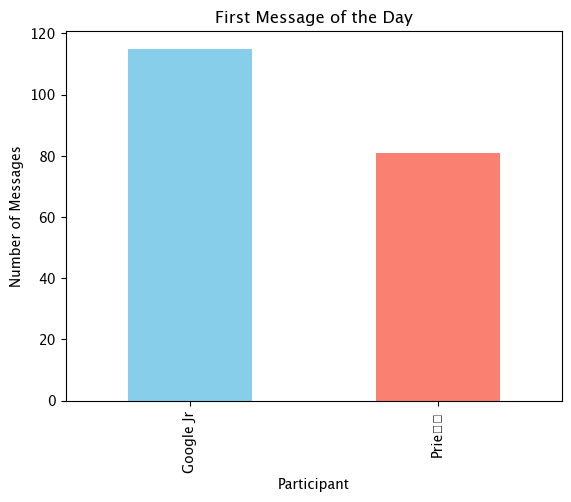

In [78]:
# Who sends the first message of the day more often?
first_message_counts = df.groupby('Date')['Time'].transform('min') == df['Time']
first_message_counts = df[first_message_counts]['Sender'].value_counts()
first_message_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('First Message of the Day')
plt.xlabel('Participant')
plt.ylabel('Number of Messages')
plt.show()


In [80]:
# Who says "I miss you" the most?
participant1_miss_count = participant1_messages['Message'].str.contains('i miss you', case=False).sum()
participant2_miss_count = participant2_messages['Message'].str.contains('i miss you', case=False).sum()

print(f"\nTotal 'I miss you' counts:")
print(f"{participant1}: {participant1_miss_count}")
print(f"{participant2}: {participant2_miss_count}")


Total 'I miss you' counts:
Prie♥️: 51
Google Jr: 61


/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9829 (\N{BLACK HEART SUIT}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)


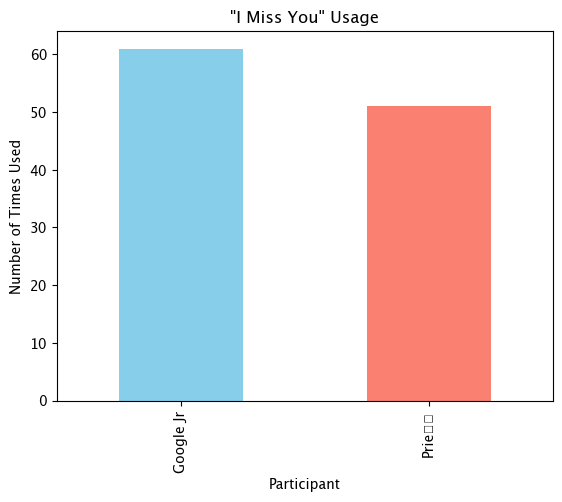

In [82]:
# Plot who says "I miss you" more
miss_you_counts = df['Message'].str.contains('i miss you', case=False)
miss_you_counts = df[miss_you_counts]['Sender'].value_counts()
miss_you_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('"I Miss You" Usage')
plt.xlabel('Participant')
plt.ylabel('Number of Times Used')
plt.show()

/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9829 (\N{BLACK HEART SUIT}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)


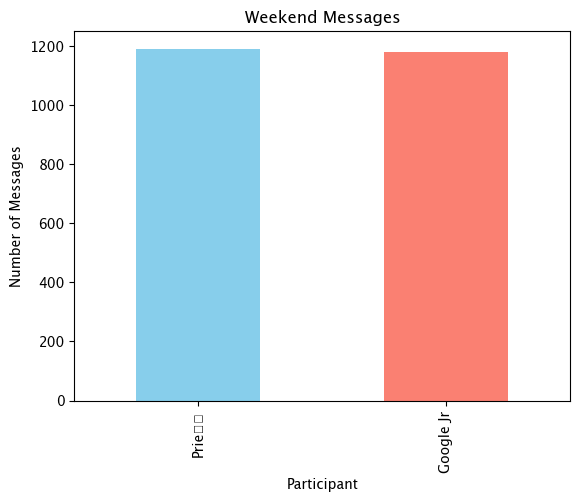

In [84]:
# Who is more likely to send a message on a weekend?
df['Day'] = df['Date'].dt.day_name()
weekend_counts = df['Day'].apply(lambda x: x in ['Saturday', 'Sunday'])
weekend_counts = df[weekend_counts]['Sender'].value_counts()
weekend_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Weekend Messages')
plt.xlabel('Participant')
plt.ylabel('Number of Messages')
plt.show()

/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9829 (\N{BLACK HEART SUIT}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)


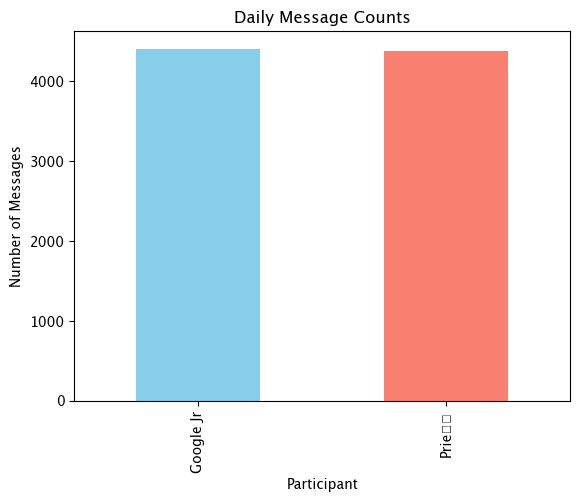

In [86]:
# Who is consistently more active?
daily_message_counts = df['Sender'].value_counts()
daily_message_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Daily Message Counts')
plt.xlabel('Participant')
plt.ylabel('Number of Messages')
plt.show()

In [90]:
# Who uses emojis more often?
participant1_emojis = participant1_messages['Message'].str.contains(r'[^\w\s]').sum()
participant2_emojis = participant2_messages['Message'].str.contains(r'[^\w\s]').sum()

print(f"\nTotal Emojis Used:")
print(f"{participant1}: {participant1_emojis}")
print(f"{participant2}: {participant2_emojis}")


Total Emojis Used:
Prie♥️: 2420
Google Jr: 3471


/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9829 (\N{BLACK HEART SUIT}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)


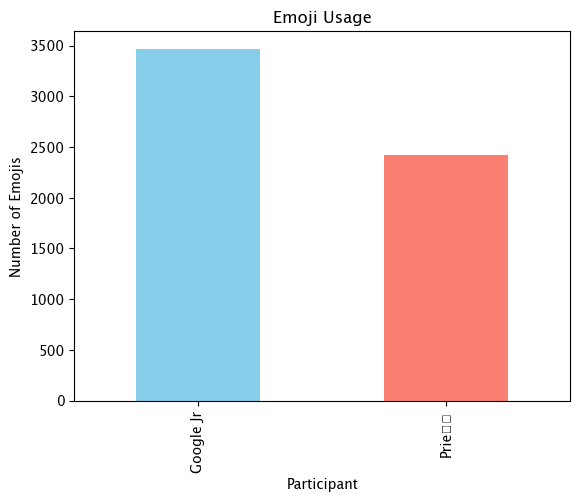

In [92]:
# Plot who uses emojis more
emoji_counts = df['Message'].str.contains(r'[^\w\s]')
emoji_counts = df[emoji_counts]['Sender'].value_counts()
emoji_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Emoji Usage')
plt.xlabel('Participant')
plt.ylabel('Number of Emojis')
plt.show()

/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9829 (\N{BLACK HEART SUIT}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)


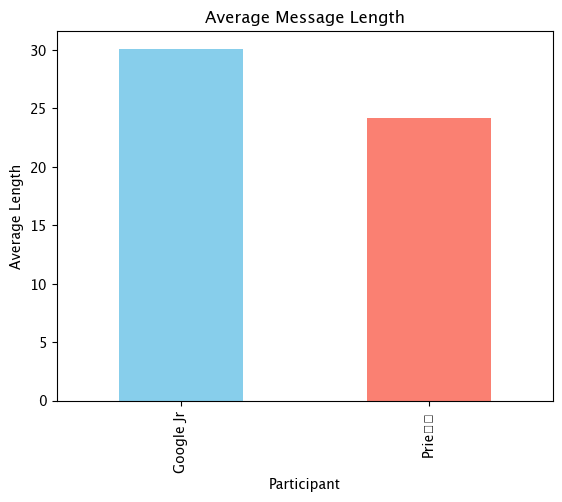

In [94]:
# Who sends longer messages?
df['MessageLength'] = df['Message'].str.len()
avg_message_length = df.groupby('Sender')['MessageLength'].mean()
avg_message_length.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Message Length')
plt.xlabel('Participant')
plt.ylabel('Average Length')
plt.show()

In [96]:
# Who has a bigger vocabulary?
unique_words = set(words)
participant1_vocab = len(participant1_messages['Message'].str.split().explode().unique())
participant2_vocab = len(participant2_messages['Message'].str.split().explode().unique())

print(f"\nUnique Words Used:")
print(f"{participant1}: {participant1_vocab}")
print(f"{participant2}: {participant2_vocab}")


Unique Words Used:
Prie♥️: 4192
Google Jr: 5596


/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9829 (\N{BLACK HEART SUIT}) missing from font(s) Lucida Grande.
  fig.canvas.draw()
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Lucida Grande.
  fig.canvas.draw()
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9829 (\N{BLACK HEART SUIT}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)


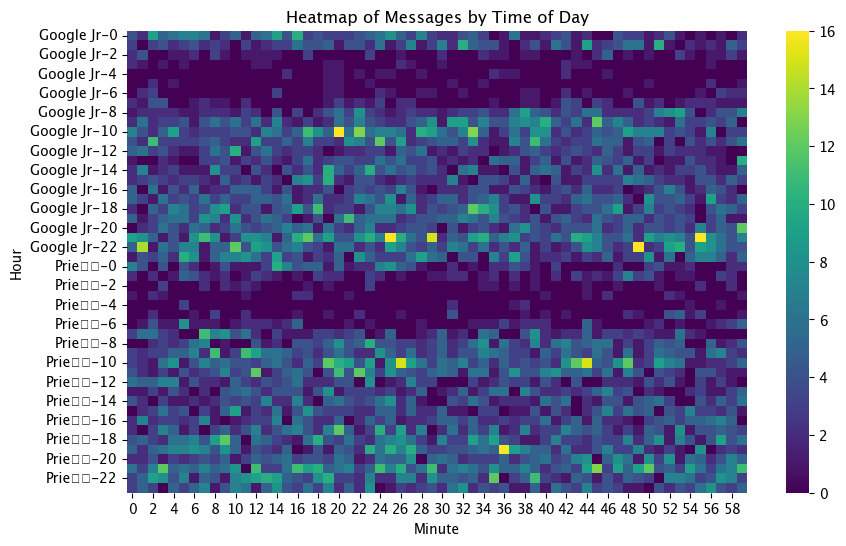

In [103]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

# Plotting the heatmap
heatmap = df.groupby(['Sender', 'Hour', 'Minute']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, cmap='viridis')
plt.title('Heatmap of Messages by Time of Day')
plt.xlabel('Minute')
plt.ylabel('Hour')
plt.show()

In [104]:
# Number of average messages sent per day
average_messages_per_day = df['Date'].value_counts().mean()
print("\nAverage number of messages sent per day:", average_messages_per_day)


Average number of messages sent per day: 45.11794871794872
